 # <center> Data Science Case Study : Cost-Benefit Analysis </Center>
#### <center> By
## <Center> Taifur Chowdhury

# Business Understanding

**Objective:**

For this case study, we build classification models that help minimize the monetary cost to company of miscalssifying a class of the response variable. To solve this problem binary clasification models were used analyze the dataset, and  their prediction accuracies infered to solved the business problem.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Rectangle
from matplotlib import pyplot

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import det_curve

from mlxtend.evaluate import accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from os import path
import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Mount Drive 
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd /content/drive/My Drive/Quantify The World
df = pd.read_csv('final_project_7.csv')

# Data Evaluation

We pulled the data from the smu small box, which contains the anonymous dataset with numerous observations of the presented features. The response variable in this dataset is "y", and the predictors are "x0" through "x49", making a total of 51 variables. The dataset contains five categorical and 46 numerical variables. The EDA reveals, 1608 records with missing values for some features. We removed the records with missing data as we cannot input them to fill up missing data, and they only represent approximately 1% of the data. We decided to take this step because we do not want to influence rows with some missing values to influence our prediction as it can have cost implication. Meaning it can manipulate false positives and false negatives which can cost the company.

Furthermore, the categorical variables were analyzed to gain insight. The feature "x24" has three classes for geographical location, namely, "Asia", "Americas" and "Europe". The "x29" feature has the months of the year as its classes, ranging from January through December. The highest incidence among those classes happened in July when plotted against the response variable. 

The next categorical feature, "x30", has days of the week, including Monday through Friday. Another categorical feature, "x32", is a numerical feature with the percentage “%” sing. We removed the “%” sign, but it would be factored into the output. The highest incidence is Wednesday. 

The next feature examined is "x37", a numerical variable with the dollar sign "$" making it categorical. Again, we dropped the dollar sign to make that feature numerical. Finally, the team decided to drop the categorical features "x24", "x29", and "x30" from the dataset because the company’s data has the same variables as their production input.

A closer look at the response variable shows that there are two classes, "0" and "1", making this a binary variable. For this reason, the team decides to use any binary classifier to solve this class prediction problem.

In [6]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [10]:
#Checking for null values in all the features

print('**Missing Values**')
print(df.isnull().sum())
print(1 * "\n")


**Missing Values**
x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64




In [11]:
# Shape of Dataframe before dropping missing values 

df.shape



(160000, 51)

In [12]:
# Dropping the missing values
df = df.dropna()

In [13]:
# Verifying the drop of missing values

df.isnull().sum().sum()

0

In [20]:
# Shape of dataframe after dropping missing values 

print("Shape of Dataframe after dropping missing values: ", df.shape)
print("Removed ",(1-(158392/160000))*100, "% values from original dataframe")

Shape of Dataframe after dropping missing values:  (158392, 51)
Removed  1.0050000000000003 % values from original dataframe


In [21]:
#Viewing Categorical data to gain more inforamtion

df.loc[:,['x24','x29','x30','x32','x37']]

,x24,x29,x30,x32,x37
0,euorpe,July,tuesday,0.00,1313.96
1,asia,Aug,wednesday,-0.02,1962.78
2,asia,July,wednesday,-0.01,430.47
3,asia,July,wednesday,0.01,-2366.29
4,asia,July,tuesday,0.01,-620.66
...,...,...,...,...,...
159995,asia,Aug,wednesday,0.00,-891.96
159996,asia,May,wednesday,-0.01,1588.65
159997,asia,Jun,wednesday,0.00,687.46
159998,asia,May,wednesday,-0.02,439.21


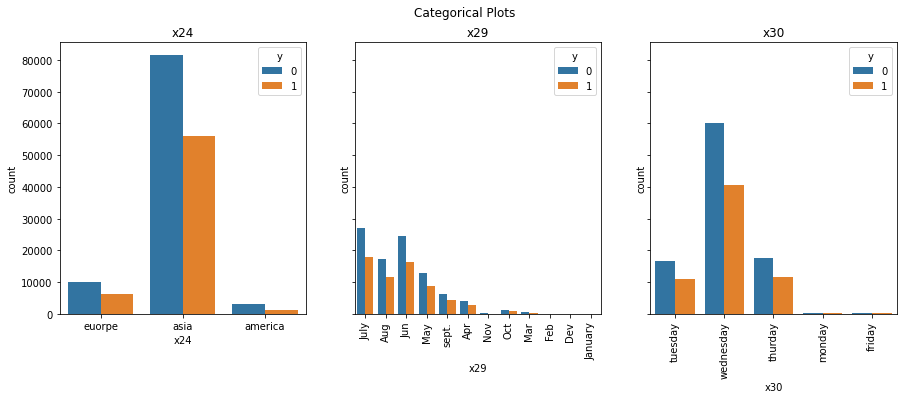

In [22]:
#Plotting categorical Feature in the dataset

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Categorical Plots')

sns.countplot(ax=axes[0],x="x24", data=df,hue="y")
axes[0].set_title("x24")
axes[0].tick_params(labelrotation=0)

sns.countplot(ax=axes[1],x="x29", data=df,hue="y")
axes[1].set_title("x29")
axes[1].tick_params(labelrotation=90)


sns.countplot(ax=axes[2],x="x30", data=df,hue="y")
axes[2].set_title("x30")
axes[2].tick_params(labelrotation=90)

In [23]:
# vizualing the distribution of the feature "x37" to process

cat_disb_x37 = df.groupby(by=['x37'])
cat_disb_x37_count = (cat_disb_x37['x37'].count())
cat_disb_x37_count.all

<bound method NDFrame._add_numeric_operations.<locals>.all of x37
-4734.54    1
-4390.39    1
-4234.06    1
-4129.96    1
-4100.56    1
           ..
 4830.43    1
 4966.66    1
 4990.20    1
 5105.06    1
 5546.99    1
Name: x37, Length: 128126, dtype: int64>

In [24]:
# dropping the percent sign in the feature "x32" and changing the data type

df['x32'] = df['x32'].astype(str)
df['x32'] = df['x32'].str.replace('%', '')
df['x32'] = df['x32'].astype(float)

In [27]:
# dropping dollar sign and converting data type to float 

def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)
df['x37'] = df['x37'].apply(clean_currency).astype('float')
df['x37'].apply(type).value_counts()


<class 'float'>    158392
Name: x37, dtype: int64

In [31]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,6.706030,-1.832959,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052,0.401195
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,18.675642,5.110079,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134,0.490142
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,-5.802178,-5.159340,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046,0.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,6.847926,-1.922935,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139,0.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,19.269855,1.452018,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069758,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 48 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

0    0.598805
1    0.401195
Name: y, dtype: float64

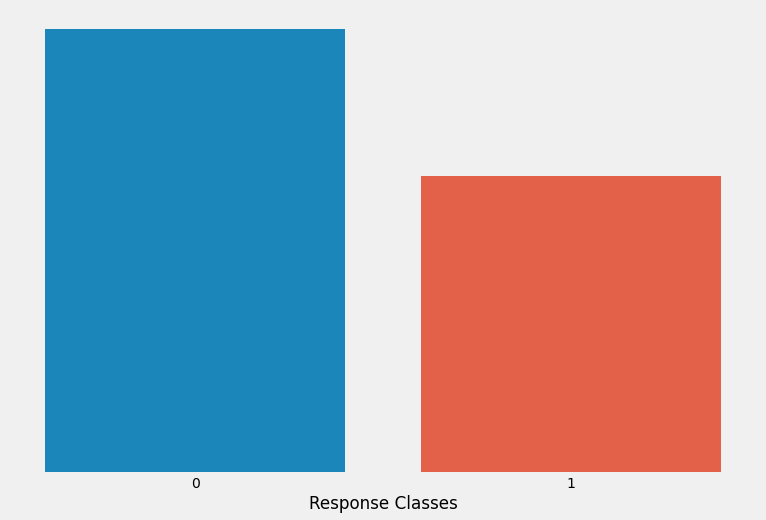

In [32]:
# Visualize Response classes

import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
sns.countplot(df['y'])
plt.xlabel('Response Classes')
plt.ylabel('')
plt.yticks([])
df['y'].value_counts(normalize=True)

Text(0, 0.5, 'Response y')

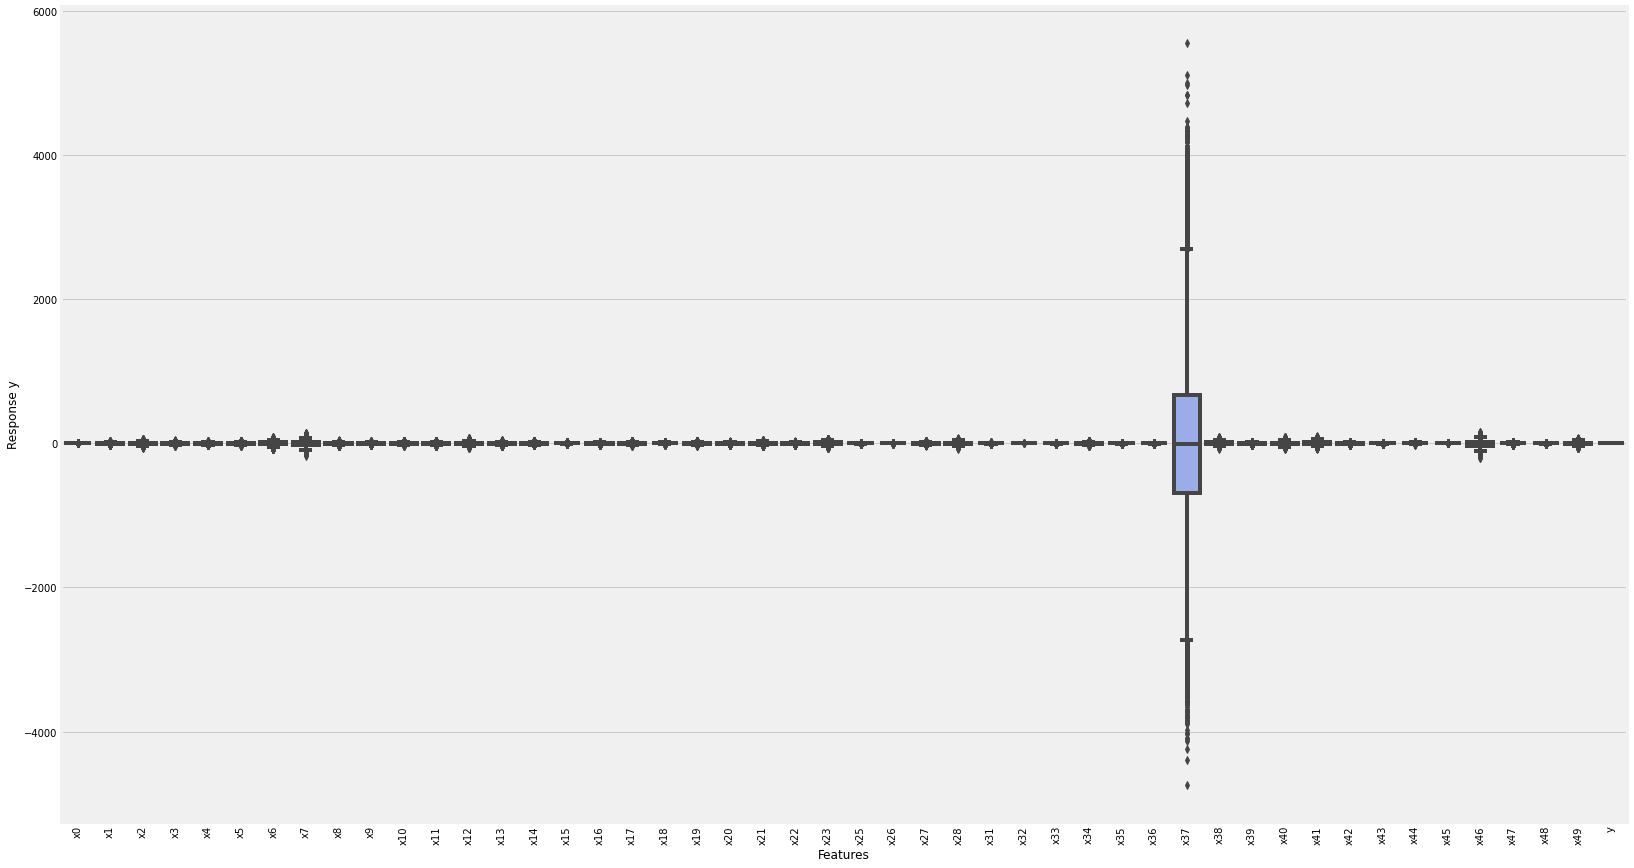

In [33]:
# Looking for  Outliers and removing them from the dataset
import pandas as pd
import numpy as np

%matplotlib inline
plt.figure(figsize=(25,15))

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df_outlier_removed=remove_outlier_IQR(df)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final

sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Response y')

# Modeling Preparations

 

The model preparation for this problem looked at scaling the data using the RobustScaler to reduce the outliers' influence on the data. The team split the refined dataset in the ratio of 80 to 20 percent for train and test, respectively, to build the model. Since this is a classification problem, to learn the cost implication of misclassifying our response classes, Logistics regression, Stochastic gradient descent (SGD), and Random Forest were the models chosen to analyze and solve the problem. We then compared these models on accuracy. The team chose the model with the best Accuracy to look at the cost-benefit a misclassification will have on the business operation.

In [34]:
# separating the dataset into X variables and Y reponse for onward analysis
X = df.loc[:, df.columns!='y']
y = df['y']

In [35]:
# Scale X and  split data into 80 to 20 test split for model building 

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


scaler_train = RobustScaler().fit(X_train)
scaler_test = RobustScaler().fit(X_test)
X_train = scaler_train.transform(X_train)
X_test = scaler_test.transform(X_test)

In [37]:
# GridSearch for Logistic Regression

import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

params = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C" : [0, 0.0001, 0.001, 0.01, 0.1, 1],
    "penalty" : ["none", "l1", "l2" ]
}

model = LogisticRegression(max_iter=10000)
clf2 = GridSearchCV(model, param_grid = params)
clf2.fit(X_train, y_train)
predicted = clf2.predict(X_test)
report = classification_report(y_test, predicted)

print(clf2.best_params_)

print(clf2.best_score_)

print(report)
#%time

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.7025088144847313
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     19096
           1       0.66      0.52      0.58     12583

    accuracy                           0.70     31679
   macro avg       0.69      0.67      0.68     31679
weighted avg       0.70      0.70      0.70     31679



In [38]:
df_log_results = pd.DataFrame(clf2.cv_results_)
df_log_results [['param_C', 'params', 'mean_test_score']]


,param_C,params,mean_test_score
0,0,"{'C': 0, 'penalty': 'none', 'solver': 'newton-...",0.702454
1,0,"{'C': 0, 'penalty': 'none', 'solver': 'lbfgs'}",0.702398
2,0,"{'C': 0, 'penalty': 'none', 'solver': 'libline...",NaN
3,0,"{'C': 0, 'penalty': 'none', 'solver': 'sag'}",0.702414
4,0,"{'C': 0, 'penalty': 'none', 'solver': 'saga'}",0.702422
...,...,...,...
85,1,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.702422
86,1,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.702398
87,1,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.702414
88,1,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.702414


In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C" : [0, 0.0001, 0.001, 0.01, 0.1, 1],
    "penalty" : ["none", "l1", "l2" ]
}

model = LogisticRegression(max_iter=10000)
log_clf = GridSearchCV(model, param_grid = param_grid, verbose= 2, n_jobs=-1)
log_clf.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",log_clf.best_params_)
print("accuracy :",log_clf.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7025245979357828


Fitting 5 folds for each of 90 candidates, totalling 450 fits


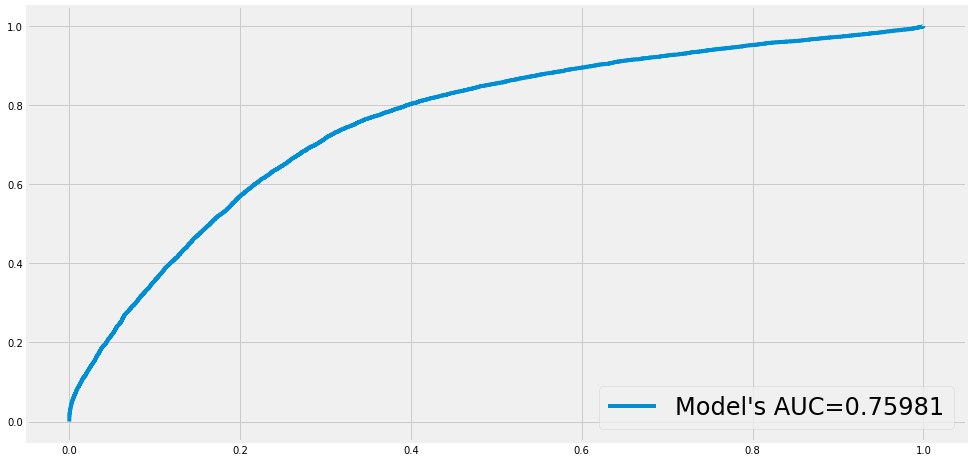

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,8))

log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

# Test the model using AOC-ROC Graph
y_pred_proba = log_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Model's AUC="+str(round(auc,5)))
plt.legend(loc=4, prop={'size': 24})
plt.show()

# SGDClassifier Model Building

In [ ]:

import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
param_grid = {
    "loss" : ["log", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["none", "l1", "l2" ]
}
model = SGDClassifier(max_iter=1000, tol=0.001)

sgd_clf = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose= 2)

sgd_clf.fit(X_train, y_train)

print("best parameters",sgd_clf.best_params_)

print("model score :",sgd_clf.best_score_)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...............alpha=0.0001, loss=log, penalty=none; total time=   0.8s
[CV] END ...............alpha=0.0001, loss=log, penalty=none; total time=   0.7s
[CV] END ...............alpha=0.0001, loss=log, penalty=none; total time=   0.8s
[CV] END ...............alpha=0.0001, loss=log, penalty=none; total time=   0.8s
[CV] END ...............alpha=0.0001, loss=log, penalty=none; total time=   0.8s
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   1.1s
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   1.2s
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   1.1s
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   1.1s
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   1.1s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=   0.7s
[CV] END .................alpha=0.0001, loss=lo

In [ ]:
#Print best parameters from SGD Classifier
print("best parameters",sgd_clf.best_params_)

best parameters {'alpha': 0.1, 'loss': 'log', 'penalty': 'none'}


In [ ]:
#Print best score from SGD Classifier
print("model score :",sgd_clf.best_score_)

model score : 0.7034795020183551


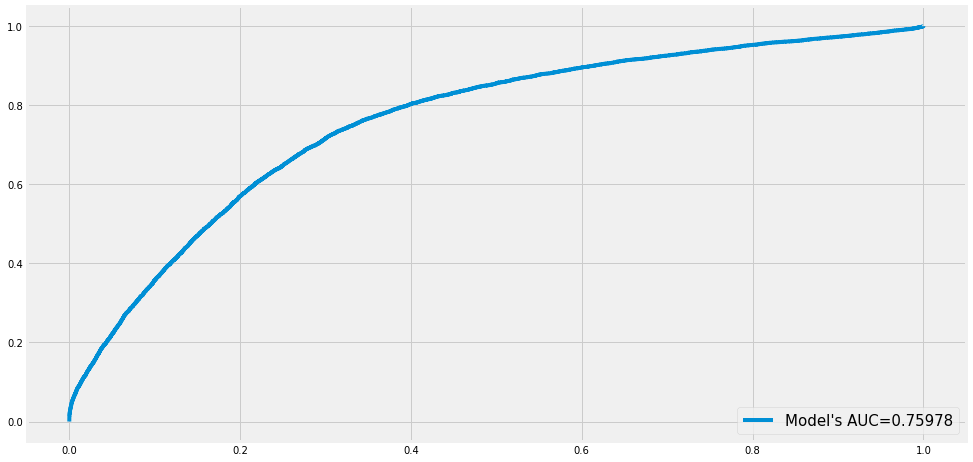

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,8))

y_pred1 = sgd_clf.predict(X_test)

# Test the model using AOC-ROC Graph
y_pred_proba1 = sgd_clf.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr1,tpr1,label="Model's AUC="+str(round(auc1,5)))
plt.legend(loc=4, prop={'size': 15})
plt.show()

# Random Forest Model Building

In [ ]:
import time
import pandas as pd 
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [30, 100, 150]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Defining the criterion
criterion = ['gini', 'entropy']

param_rf = { 
    'n_estimators': n_estimators,
    'max_features': max_features,
    'criterion': criterion 
}


rf = RandomForestClassifier()

rf_clf = GridSearchCV(rf, param_grid = param_rf, cv = 5, verbose= 2)

rf_clf.fit(X_train, y_train)

rf_predicted = rf_clf.predict(X_test)

rf_report = classification_report(y_test, rf_predicted)

print(rf_clf.best_params_)

print(rf_clf.best_score_)

%time

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=  25.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=  24.3s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=  24.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=  24.3s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=  24.5s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time= 1.4min
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time= 1.4min
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time= 1.4min
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time= 1.4min
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time= 1.4min
[CV] END criterion=gini, max_features=auto, n_estimators=150; total time= 2.0min
[CV] END criterion=gini, max_features=auto, n_es

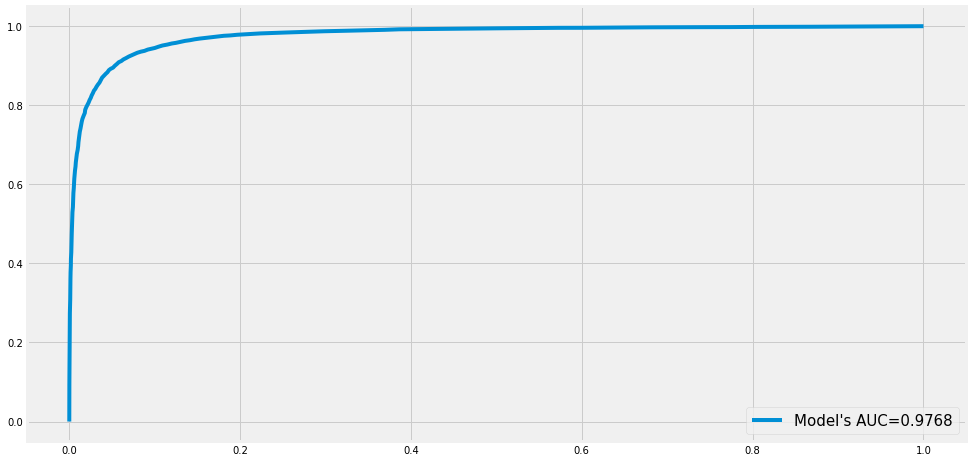

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,8))

y_pred2 = rf_clf.predict(X_test)

# Test the model using AOC-ROC Graph
y_pred_proba2 = rf_clf.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr2,tpr2,label="Model's AUC="+str(round(auc2,5)))
plt.legend(loc=4, prop={'size': 15})
plt.show()

# Model Building & Evaluation

### Model Setup:

Our team has built three models for predicting monetary loss of customers. We have chosen Logistic Regression, SGDClassifier, and Random Forest for classification modeling. We have scaled the data for Logistic Regression and SGDClassifier because these two algorithms require scaling for learning about features for effective modeling and prediction. Random Forest is a tree-based algorithm which doesn’t require to normalize data. Hence, we did not scale the data. 

For Logistic Regression, we have chosen the following parameters for model building:

"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
"C": [0, 0.0001, 0.001, 0.01, 0.1, 1],
"penalty": ["none", "l1", "l2" ]

Using GridsearchCV function, we have created several models which can help us notice the optimal parameters that have produce the best score. The following set of parameters have produced the best score for this algorithm: 

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
**Score: 0.7025 or 70.25%**

For SGDClassifier, we have chosen the following parameters for model building: 

"loss": ["log", "squared_hinge", "modified_huber", "perceptron"],
"alpha": [0.0001, 0.001, 0.01, 0.1],
"penalty": ["none", "l1", "l2"]

Using GridsearchCV function, we have created several models which can help us notice the optimal parameters that have produce the best score. The following set of parameters have produced the best score for this algorithm: 

Best Parameter: {'alpha': 0.1, 'loss': 'log', 'penalty': 'none'}
**Score: .7035 or 70.35%**

For Random Forest, we have chosen the following parameters for model building: 

n_estimators = [30, 100, 150]
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']

Using GridsearchCV function, we have created several models which can help us notice the optimal parameters that have produce the best score. The following set of parameters have produced the best score for this algorithm: 

**Best Parameter:** 
**Score:0.9768 or 97.68%** 

Based on the best scores from above three models, Random Forest was chosen to generate a confusion matrix as seen below to analyze figure that will be passed into a cot benefit matrix for an idepth understanding in dollar terms.



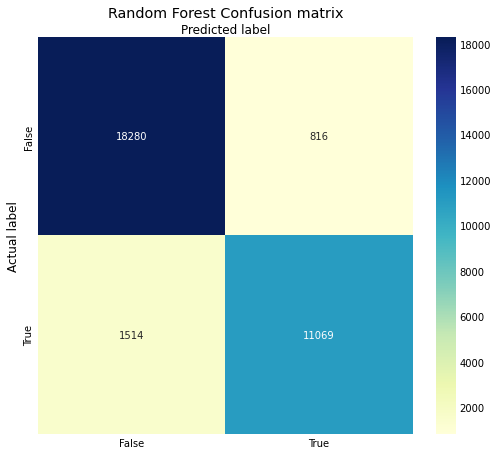

In [ ]:
import warnings
# Extract the best decision forest 
#best_clf = grid_results.best_estimator_
y_pred3 = rf_clf.predict(X_test)

# Create a confusion matrix
rf_cnf_matrix = confusion_matrix(y_test, y_pred3)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

warnings.filterwarnings("ignore")

# Monetary Outcome

In [ ]:
# Confusion Matrix Using Random Forest Model (Optimal Model)
import numpy as np 
Confusion_matrix_RF = np.array([[18280,816],[1514, 11069]])

Cost_matrix = np.array([[0, -100], [-25, 0]])

Monetary_cost = Confusion_matrix_RF * Cost_matrix

print('Cost for False Positive and False Negatives: ', Monetary_cost)

Cost for False Positive and False Negatives:  [[     0 -81600]
 [-37850      0]]


#Cost Benefit Matrix
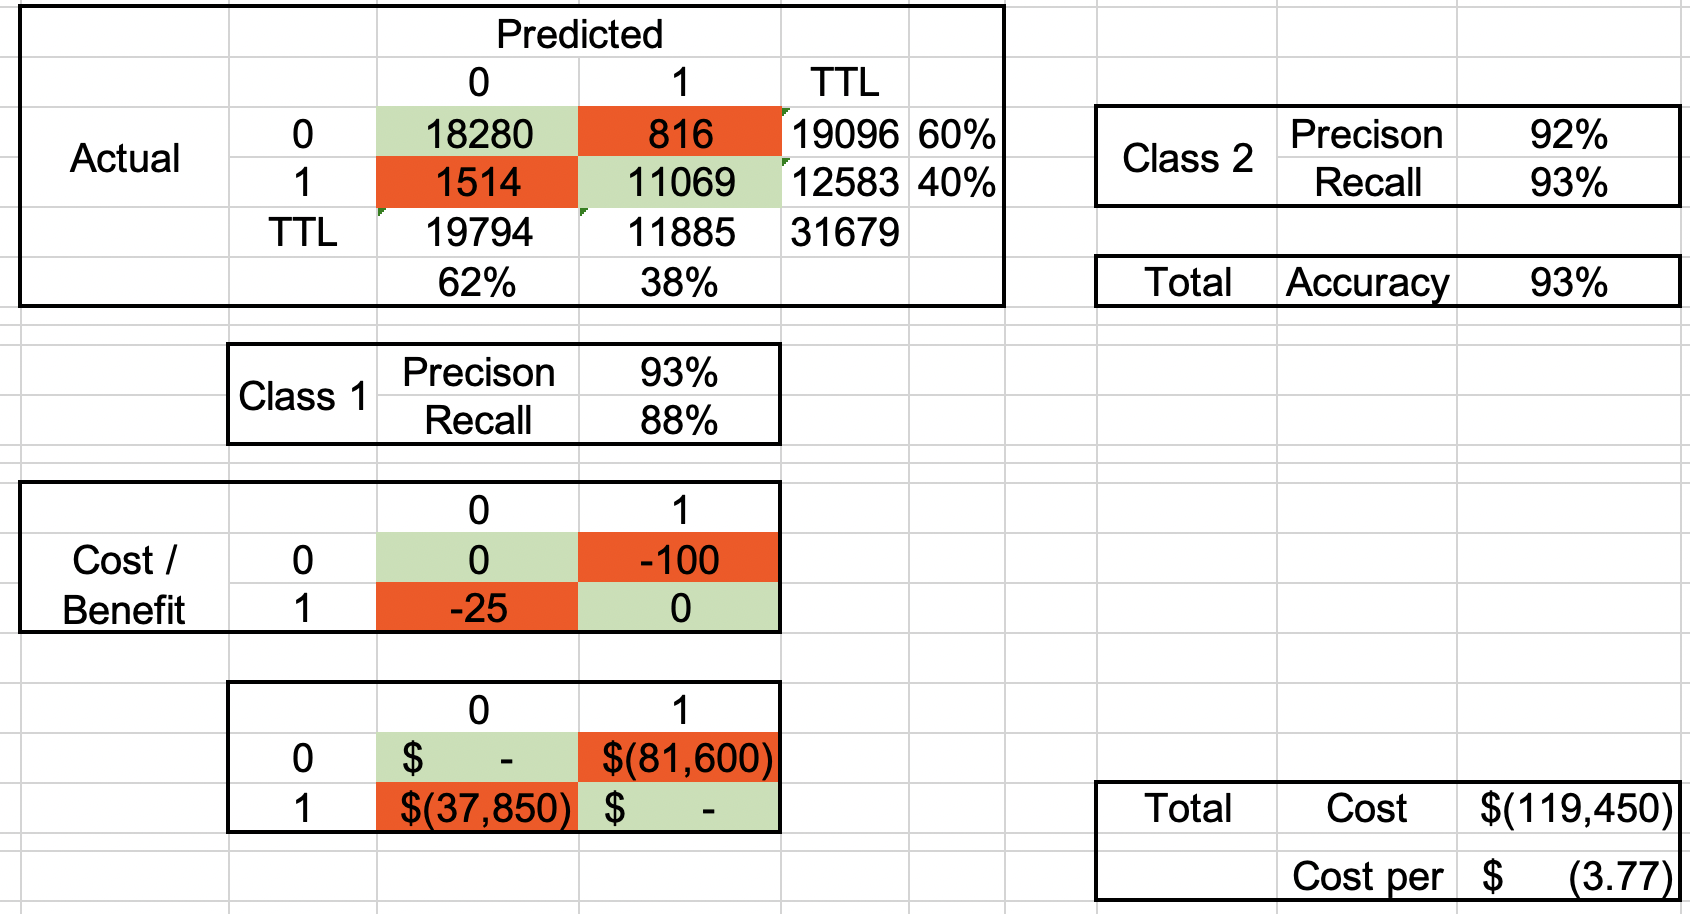

# **Monetary Outcome:**

The cost-benefit table above shows that out of 19,096 actual counts of "0", the model misclassified 816 as "1". Also, out of 12,583 observations for "1", the model misclassified 1514 as "0". These values mean that 93% of the time, the model accurately classifies the response class correctly; this implies that a cost function of one hundred applies to every misclassified "0" and twenty-five for every misclassified "1". These translated into monetary cost we described below.
 
We have selected the data from the Random Forest model's confusion matrix to calculate the monetary cost of predicting incorrect class 1 and incorrect class 0. For class 1, our precision rate is 93% which means we have correctly predicted 1s 93% of the time. The recall rate for class 1 is 88% which means our model has identified 88% of the 1s. For class 2, our precision rate is 92% which means we have correctly predicted 0s 92% of the time. The recall rate for class 2 is 93% which means our model has identified 93% of the 0s. The accuracy rate is 93%. These metrics have monetary implications because they cost the company money for false-positive and false-negative predictions. For every false positive, it costs the company 100 dollars. For every false negative, it costs 25 dollars. Given data from our test datasets, we notice it costs the company 81,600 dollars for all false positives and 37,850 dollars for all false negatives. Using the optimal model, the total costs are 119,450 dollars and 3.77 dollars per unit.
 
Source: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall


# **Conclusion:**

Given the company’s objective is to minimize the cost associated with false predictions, data scientists need to lower the false-positive rate because it costs the company 80% more per prediction than false-negative. In this study, given the total costs, false-positive costs are 68% more than false negatives. So, going forward, we notice that it is essential for the company to return to the Random Forest model to produce better accuracy and, most importantly, lower the false positives rate. We also recommend deep learning to notice whether neural network models lower false-positive rates for future research.
